# Hello Treebeard!

Thanks for trying out Treebeard's cloud deploy and scheduling service.  


1. [Requirements](#Requirements)
2. [Outputs](#Outputs)
3. [Examples](#Examples)
    - [Call an API](#Call-an-API)
    - [Check a hosted file](#Check-a-hosted-file)

## Requirements

In [1]:
import treebeard
# This notebook does not depend on the treebeard library, but it should be present in your requirements file.
# The underlying build service sends this notebook to a cloud server which uses the papermill library to run
# the notebook. Having treebeard as a dependency ensure this functions correctly.

There must be a dependencies file alongside this notebook, either requirements.txt, a pipenv Pipfile, or a Conda environment.yml file.

In [2]:
# Setup
import os
import matplotlib.pyplot as plt 
import requests
import json
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

## Output

**Output** from your notebooks should be saved in an `output` directory.  
If so, they will be saved on the cloud build server, versioned, and made available via URL endpoints.  
They can be listed on the Treebeard admin page that you can find after running a build.

In [3]:
# create an outputs directory if it does not exist
if 'output' not in os.listdir(): os.mkdir('output')

# Examples

Here are a few simple examples of data that might be interesting to check over time.

## Call an API

What's the current price of BitCoin?

In [4]:
r = requests.get('https://api.coindesk.com/v1/bpi/currentprice.json').json()
print(f"At {r['time']['updateduk']}, the price of Bitcoin is £{r['bpi']['GBP']['rate']}")
# This data was produced from the CoinDesk Bitcoin Price Index (USD). Non-USD currency data converted using hourly conversion rate from openexchangerates.org

At Feb 11, 2020 at 11:42 GMT, the price of Bitcoin is £7,579.0896


See the last 30 days of the price of Bitcoin, thanks to CoinDesk's API

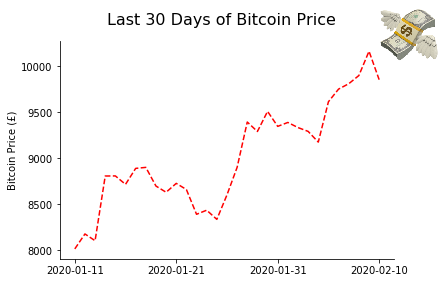

In [5]:
r = requests.get('https://api.coindesk.com/v1/bpi/historical/close.json').json()

fig, ax = plt.subplots()
ax.plot(pd.DataFrame.from_dict(r)['bpi'][:-2], color='red', linestyle='--')
ax.set_ylabel('Bitcoin Price (£)')
fig.suptitle('Last 30 Days of Bitcoin Price', size=16)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
ax.xaxis.set_major_locator(plt.MaxNLocator(4))

im = plt.imread('https://emojipedia-us.s3.dualstack.us-west-1.amazonaws.com/thumbs/320/apple/237/money-with-wings_1f4b8.png')
newax = fig.add_axes([0.8, 0.8, 0.2, 0.2], anchor='NE')
newax.imshow(im)
newax.axis('off')
plt.savefig('output/bitcoin_price.png', dpi=150, bbox_inches='tight')

## Call a python script

Notebooks often interact with custom scripts.  
The script `my_script.py` is called into this notebook and a function executed.

In [2]:
# This depends on which directory you are running jupyter from

# from examples.hello_treebeard.my_script import greeter # project root
from my_script import greeter # or hello_treebeard

greeter('World')

Hello World


## Running Treebeard

Ok, let's run this in the cloud!  
You'll need to run `treebeard configure` in the command line to register your account.  
For a new project you'll need to run `treebeard setup` in the project directory to create a `treebeard.yaml` file. However this has already been done. 

In the command line run `treebeard run` to compress the project folder, create a docker container and request a cloud build.  

You will receive a link to the admin page where you can see results after a few minutes.  
It is simple to add a schedule flag to this command: `treebeard run --daily`

The saved image outputs can be seen in the admin page, see [the documentation](https://treebeard.readthedocs.io/en/latest/outputs.html) for the URL schema to access them.